<center><h1>Fernandes_Alrik_HW3</h1></center>
<br>
<br>

Name: Alrik Melville Fernandes
<br>
Github Username: AlrikF
<br>
USC ID: 4036859519

## 1. Time Series Classification Part 1: Feature Creation/Extraction

### (a) Download Data

Package imports

In [1]:
# !pip install detect_delimiter
import os
import pandas as pd
import numpy as np
from sklearn.utils import resample
from detect_delimiter import detect
from pandas import read_csv
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot as plt

Get the AReM Data Set

In [2]:
rootdir= '.././data/AReM'

### (b) Test and Train Data

In [3]:
train_files =[]
test_files  =[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        folder=subdir.split('\\')
        if len(folder)<2:
            continue
        folder=folder[1]
        if folder in ['bending1','bending2']:
            if file in ['dataset1.csv','dataset2.csv']:
                test_files.append('/'.join([folder,file]))
            else:
                train_files.append('/'.join([folder,file]))
        else:
            if file in ['dataset1.csv','dataset2.csv','dataset3.csv']:
                test_files.append('/'.join([folder,file]))
            else:
                train_files.append('/'.join([folder,file]))
                            

        


### (c) Feature Extraction

#### i. Research

Maximum, Minimum, Mean, Standard deviation,First quartile, Median, Third quartile, Cross Correlations , Auto Correlations , Skewness , Kurtosis are some of the time domain features 



#### ii. Extraction

In [4]:


def read_and_transform_dataset(file_list):
    headings=["Min","Max","Mean","Median","standard deviation", "first quartile", "third quartile"]
    header=[]
    for i in range(1,7):
        for head in headings:
            header.append(head+f"_{i}")
    header.append("class")
    
    final_df=pd.DataFrame([],columns=header)
    ind=0
    for file in file_list:
        f = open(rootdir+"/"+file, "r")
        delim = detect([next(f) for _ in range(10)][6])
        df=pd.read_csv(rootdir+"/"+file,  skiprows=5, header=None , sep = delim,  \
                                     names=['time','avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23'] )
        
        row=[]
        for col in df.columns[1:]:
            row.append(df[col].min())
            row.append(df[col].max()) 
            row.append(df[col].mean())
            row.append(df[col].median())
            row.append(df[col].std())
            row.append(df[col].quantile(0.25))
            row.append(df[col].quantile(0.75))
        row.append(file.split("/")[0])
        final_df.loc[ind]=row
        ind+=1
    
    return final_df


In [5]:
train=read_and_transform_dataset(train_files)
train

,Min_1,Max_1,Mean_1,Median_1,standard deviation_1,first quartile_1,third quartile_1,Min_2,Max_2,Mean_2,...,first quartile_5,third quartile_5,Min_6,Max_6,Mean_6,Median_6,standard deviation_6,first quartile_6,third quartile_6,class
0,35.00,47.40,43.954500,44.330,1.558835,43.0000,45.0000,0.0,1.70,0.426250,...,35.3625,36.5000,0.00,1.79,0.493292,0.430,0.513506,0.0000,0.9400,bending1
1,33.00,47.75,42.179813,43.500,3.670666,39.1500,45.0000,0.0,3.00,0.696042,...,30.4575,36.3300,0.00,2.18,0.613521,0.500,0.524317,0.0000,1.0000,bending1
2,33.00,45.75,41.678063,41.750,2.243490,41.3300,42.7500,0.0,2.83,0.535979,...,28.4575,31.2500,0.00,1.79,0.383292,0.430,0.389164,0.0000,0.5000,bending1
3,37.00,48.00,43.454958,43.250,1.386098,42.5000,45.0000,0.0,1.58,0.378083,...,22.2500,24.0000,0.00,5.26,0.679646,0.500,0.622534,0.4300,0.8700,bending1
4,36.25,48.00,43.969125,44.500,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,20.5000,23.7500,0.00,2.96,0.555313,0.490,0.487826,0.0000,0.8300,bending1
5,21.00,50.00,32.586208,33.000,6.238143,26.1875,34.5000,0.0,9.90,0.516125,...,17.6700,23.5000,0.00,13.61,1.162042,0.830,1.332980,0.4700,1.3000,bending2
6,0.00,1.00,0.256438,0.000,0.275833,0.0000,0.4700,0.0,14.50,8.166250,...,0.4700,0.9400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bending2
7,19.00,45.50,30.938104,29.000,7.684146,26.7500,38.0000,0.0,6.40,0.467167,...,15.0000,20.8125,0.00,6.73,1.107354,0.830,1.080842,0.4700,1.3000,bending2
8,25.00,47.50,31.058250,29.710,4.829794,27.5000,31.8125,0.0,6.38,0.405458,...,9.0000,18.3125,0.00,4.92,1.098104,0.940,0.831480,0.5000,1.3000,bending2
9,27.00,45.00,36.819521,36.000,3.900459,33.7500,40.2500,0.0,10.47,2.600146,...,15.5000,19.2700,0.00,8.99,2.887562,2.525,1.723094,1.5600,3.7700,cycling


In [6]:
test = read_and_transform_dataset(test_files)
test

,Min_1,Max_1,Mean_1,Median_1,standard deviation_1,first quartile_1,third quartile_1,Min_2,Max_2,Mean_2,...,first quartile_5,third quartile_5,Min_6,Max_6,Mean_6,Median_6,standard deviation_6,first quartile_6,third quartile_6,class
0,37.25,45.00,40.624792,40.500,1.476967,39.2500,42.0000,0.0,1.30,0.358604,...,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.300,bending1
1,38.00,45.67,42.812812,42.500,1.435550,42.0000,43.6700,0.0,1.22,0.372438,...,32.0000,34.5000,0.0,3.11,0.571083,0.430,0.601010,0.0000,1.300,bending1
2,12.75,51.00,24.562958,24.250,3.737514,23.1875,26.5000,0.0,6.87,0.590833,...,20.5000,27.0000,0.0,4.97,0.700188,0.500,0.693720,0.4300,0.870,bending2
3,0.00,42.75,27.464604,28.000,3.583582,25.5000,30.0000,0.0,7.76,0.449708,...,15.0000,20.7500,0.0,6.76,1.122125,0.830,1.012342,0.4700,1.300,bending2
4,24.25,45.00,37.177042,36.250,3.581301,34.5000,40.2500,0.0,8.58,2.374208,...,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.900,cycling
5,28.75,44.75,37.561188,36.875,3.226507,35.2500,40.2500,0.0,9.91,2.080688,...,18.0000,21.5000,0.0,9.62,2.765896,2.450,1.769203,1.4100,3.770,cycling
6,22.00,44.67,37.058708,36.000,3.710180,34.5000,40.0625,0.0,14.17,2.438146,...,16.0000,21.0000,0.0,8.55,2.983750,2.570,1.815730,1.5000,4.150,cycling
7,23.50,30.00,27.716375,27.500,1.442253,27.0000,29.0000,0.0,1.79,0.363688,...,5.5000,10.7500,0.0,4.50,0.734271,0.710,0.613688,0.4300,1.000,lying
8,24.75,48.33,44.182937,48.000,7.495615,48.0000,48.0000,0.0,3.11,0.101875,...,2.0000,5.5425,0.0,3.91,0.692771,0.500,0.675781,0.3225,0.940,lying
9,48.00,48.25,48.004167,48.000,0.032038,48.0000,48.0000,0.0,0.43,0.007167,...,4.6700,10.0000,0.0,2.50,0.641229,0.500,0.388372,0.4600,0.830,lying


#### iii. Standard Deviation

In [7]:
train.describe().loc['std']

Min_1                   9.480823
Max_1                   6.793436
Mean_1                  6.697269
Median_1                6.738554
standard deviation_1    1.775259
first quartile_1        7.199175
third quartile_1        6.742770
Min_2                   0.000000
Max_2                   5.198050
Mean_2                  1.782466
Median_2                1.683008
standard deviation_2    0.943191
first quartile_2        1.104271
third quartile_2        2.416357
Min_3                   3.053869
Max_3                   5.152750
Mean_3                  4.136667
Median_3                4.144950
standard deviation_3    1.057328
first quartile_3        4.320331
third quartile_3        4.342020
Min_4                   1.324244
Max_4                   3.026539
Mean_4                  2.317550
Median_4                2.310067
standard deviation_4    0.477806
first quartile_4        2.128599
third quartile_4        2.570035
Min_5                   5.326634
Max_5                   5.849805
Mean_5    

In [8]:
test.describe().loc['std']

Min_1                   12.136206
Max_1                    4.379342
Mean_1                   6.790086
Median_1                 7.088085
standard deviation_1     1.869285
first quartile_1         7.673052
third quartile_1         6.385720
Min_2                    0.000000
Max_2                    4.870395
Mean_2                   1.500529
Median_2                 1.345903
standard deviation_2     0.832472
first quartile_2         0.941307
third quartile_2         2.028482
Min_3                    2.644618
Max_3                    5.393220
Mean_3                   4.588252
Median_3                 4.753522
standard deviation_3     0.760779
first quartile_3         4.554121
third quartile_3         5.014339
Min_4                    0.000000
Max_4                    1.733937
Mean_4                   1.146338
Median_4                 1.161705
standard deviation_4     0.409008
first quartile_4         0.867088
third quartile_4         1.541943
Min_5                    8.252947
Max_5         

In [9]:
bootstrapped_std_dev_df = pd.DataFrame([],columns=train.columns[:-1])
confidence_interval=pd.DataFrame([],columns=["lower","upper"])
for i in range(100):
    bootstrapped_single_df = resample(train.iloc[:,:-1])
    std_dev_df = bootstrapped_single_df.apply(lambda col: np.std(col))
    bootstrapped_std_dev_df.loc[i]=std_dev_df


for col in bootstrapped_std_dev_df.columns:
    lower = np.percentile(bootstrapped_std_dev_df[col], 5)
    upper = np.percentile(bootstrapped_std_dev_df[col], 95)
    confidence_interval.loc[col]=[lower,upper]

confidence_interval


,lower,upper
Min_1,7.973186,10.817284
Max_1,3.724827,10.144443
Mean_1,4.536169,9.278417
Median_1,4.554472,9.349475
standard deviation_1,1.525743,1.942858
first quartile_1,5.372756,9.423183
third quartile_1,4.267127,9.575952
Min_2,0.000000,0.000000
Max_2,4.721634,5.537569
Mean_2,1.464087,2.115724


#### iv. Select Features

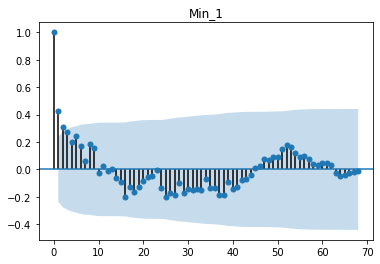

D:\AnacondaProjects\lib\site-packages\statsmodels\tsa\stattools.py:476: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[:nlags + 1] / avf[0]


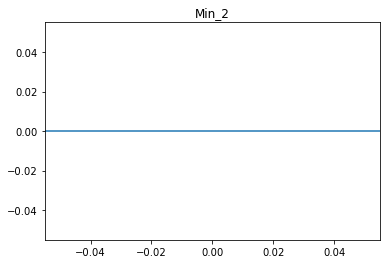

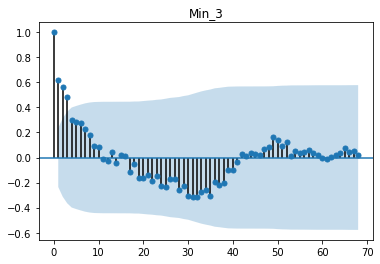

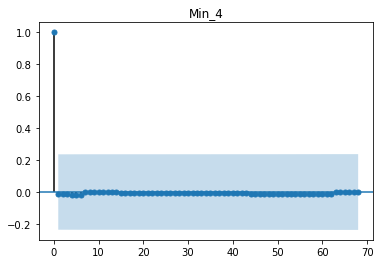

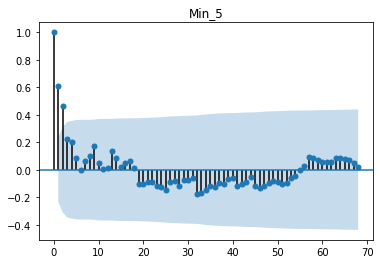

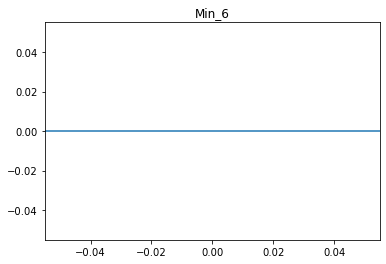

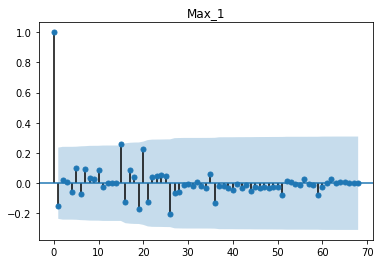

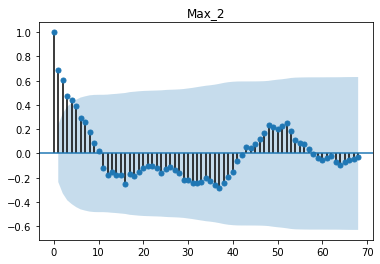

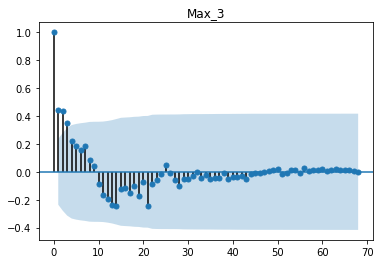

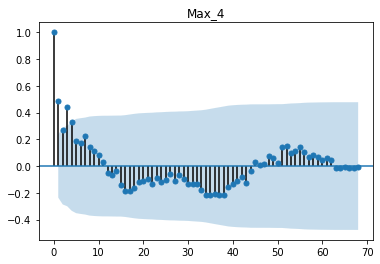

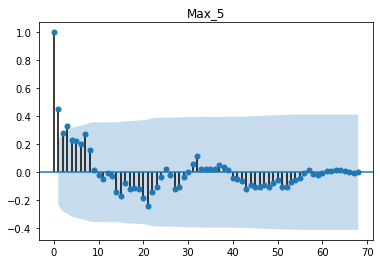

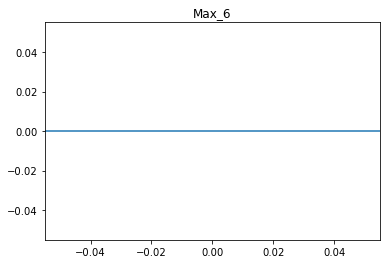

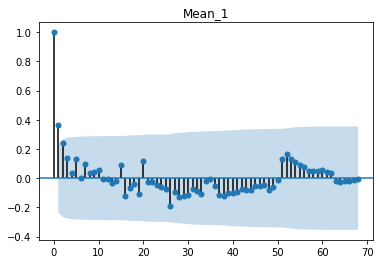

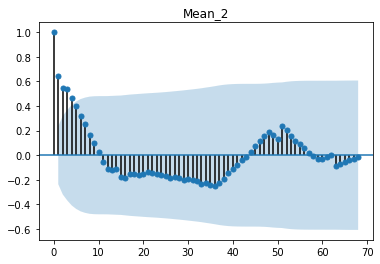

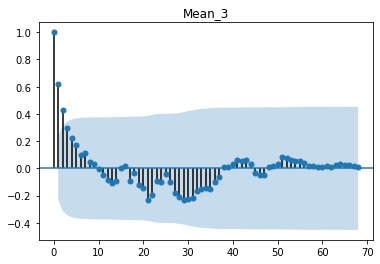

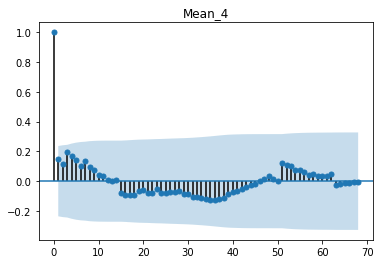

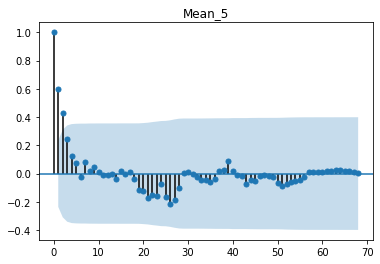

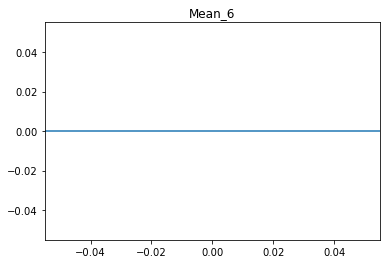

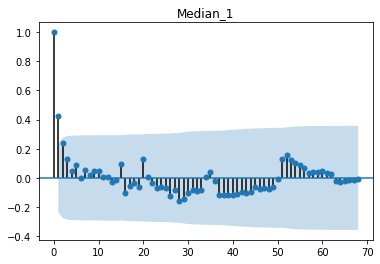

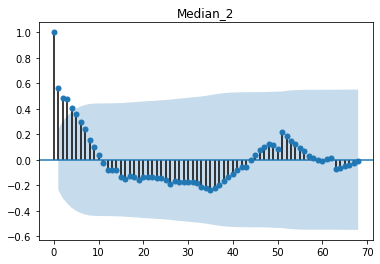

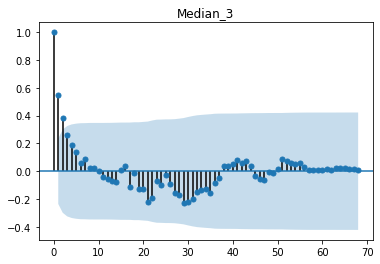

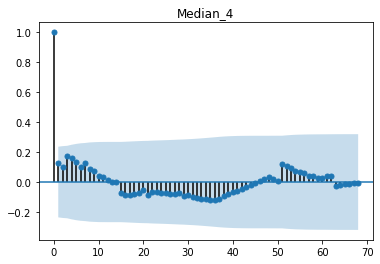

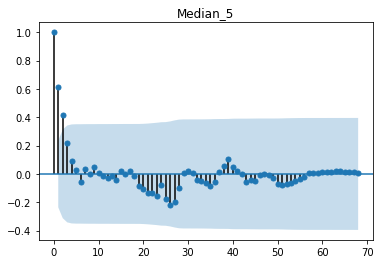

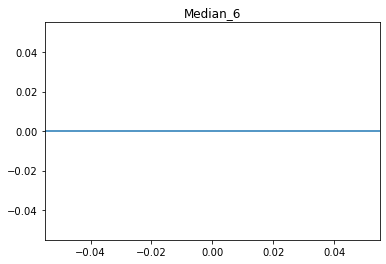

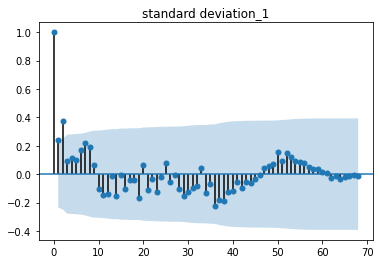

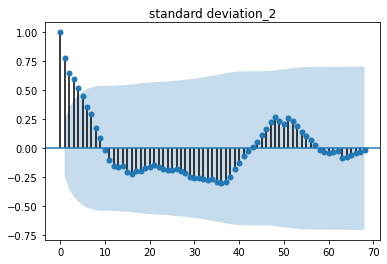

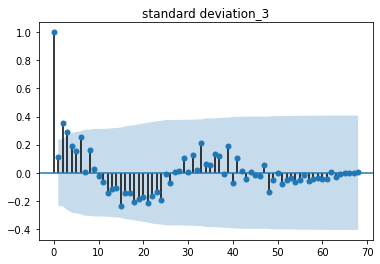

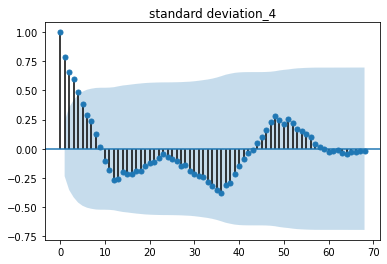

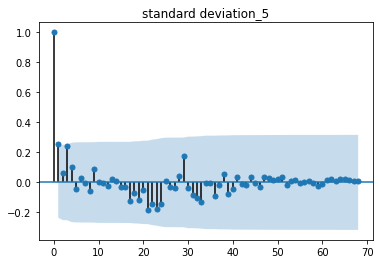

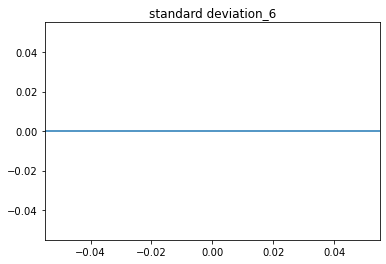

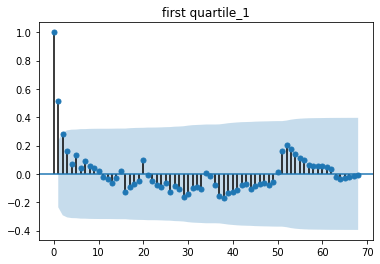

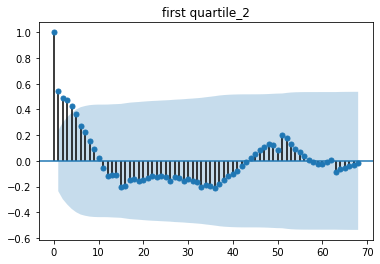

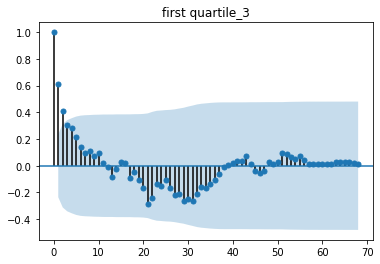

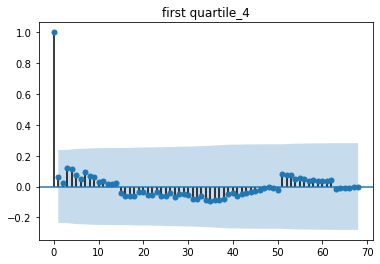

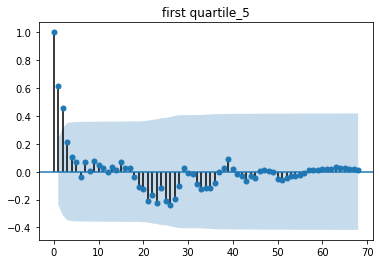

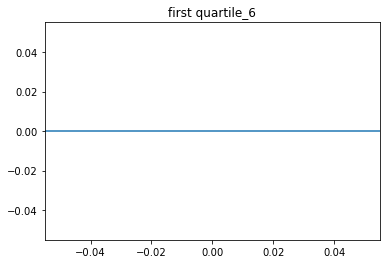

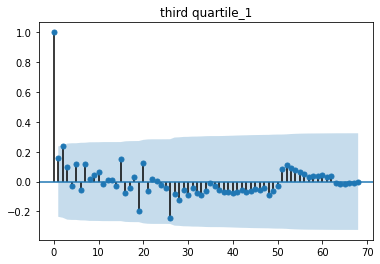

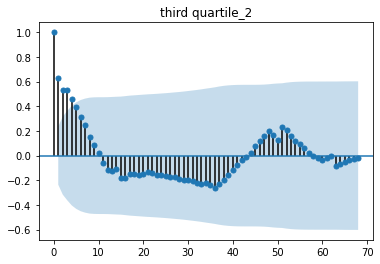

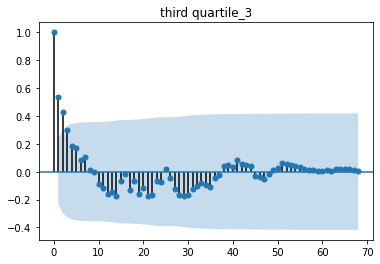

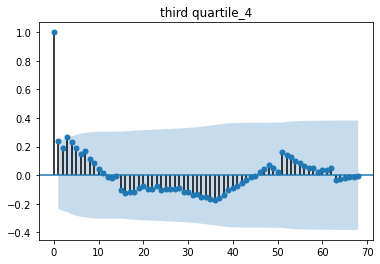

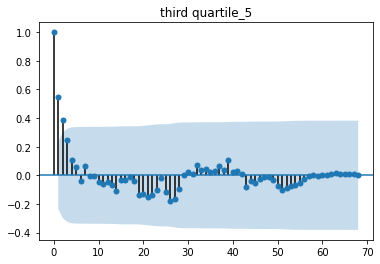

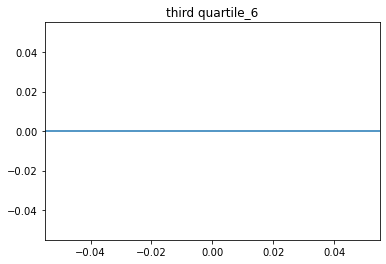

In [10]:
headings=["Min","Max","Mean","Median","standard deviation", "first quartile", "third quartile"]
for col in headings:
    for i in range(1,7):
        plot_acf(train[col + f"_{i}"])
        plt.title(col + f"_{i}")
        plt.show()

From these plots min ,max and 3rd quartile seem like the most significant features 

## 2. ISLR 3.7.4

### (a) Linear Train
(a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.



ANS : As we increase the model flexibility the training RSS for Cubic regression will be lower than linear regression even though the cubic regression model will most likely overfit given the linear nature of the data 


### (b) Linear Test

(b) Answer (a) using test rather than training RSS.

ANS : Here most likely the linear regression model will have lower error as the linear model would have generalized better given the linear nature of the data compared to the cubic regression model that would have most likely overfit the training data 

### (c) Not Linear Train

(c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.


ANS : As we increase the model flexibility the training RSS for Cubic regression will be lower than linear regression as no matter what the nature of the training data is a higher dimenison model will perform better on the training data.

### (d) Not Linear Testing

(d) Answer (c) using test rather than training RSS.

ANS : Whether the linear model or the cubic model will have lower error will depend on the data. If the nature is closer to a linear relationship then the linear model will have a lower error, otherwise if it is closer to cubic or higher dimensions than cubic then the cubic model will have a lower error.

